In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [3]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [4]:
results = [parse_file(f) for f in files]

In [5]:
df = pd.DataFrame(results)
df = df.astype('float')

In [6]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.333333,1.000000,0.500000,2.896057e+00,16.671089,9.840161e+00,1.704289e+05,412.830331,233.267535,2845.257233,4.380817e+01,6.617719e+00,2.0,0.18
1,1.000000,1.000000,1.000000,1.778466e-07,0.000001,3.062602e-07,4.019095e-11,0.000006,0.000004,0.000044,1.033095e-14,1.016251e-07,0.0,0.06
2,0.875000,1.000000,0.933333,1.887019e-02,0.108626,2.744280e-02,2.356982e-01,0.485488,0.376434,1.622925,6.058543e-05,7.782423e-03,4.0,0.02
3,0.400000,0.571429,0.470588,2.090625e+00,12.034639,3.096829e+00,2.914815e+02,17.072830,11.839810,108.466970,7.492434e-02,2.736795e-01,20.0,0.02
4,0.875000,1.000000,0.933333,6.483341e-02,0.373212,1.143836e-01,8.903875e+00,2.983936,2.065629,13.888642,2.288711e-03,4.783285e-02,4.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.411765,1.000000,0.583333,1.770579e+00,10.192298,3.872042e+00,1.088948e+03,32.999207,25.564900,137.795666,2.799103e-01,5.289812e-01,6.0,0.20
106,0.545455,0.857143,0.666667,3.600079e-01,2.072378,8.959327e-01,4.550240e+01,6.745547,5.145222,34.262771,1.169624e-02,1.081319e-01,6.0,0.12
107,1.000000,1.000000,1.000000,4.512211e-07,0.000003,7.959694e-07,1.390676e-09,0.000037,0.000027,0.000146,3.574686e-13,5.977915e-07,0.0,0.10
108,0.875000,1.000000,0.933333,1.180228e-01,0.679396,2.058611e-01,2.713360e+01,5.208993,3.626382,23.540168,6.974601e-03,8.350076e-02,12.0,0.04


<Axes: xlabel='noise', ylabel='dt'>

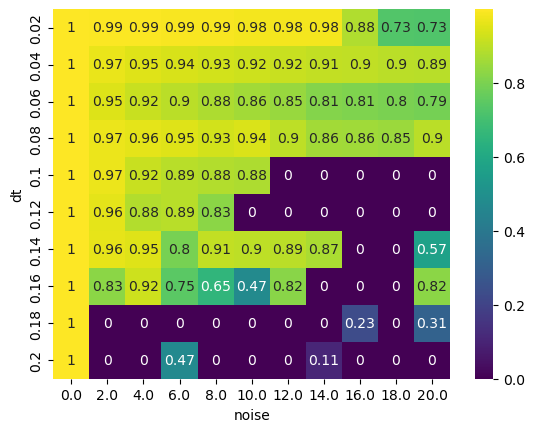

In [7]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

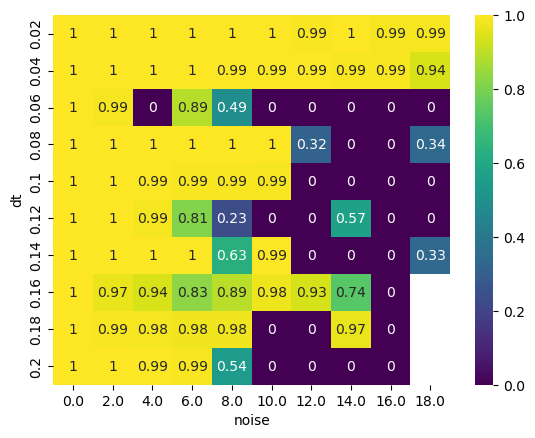

In [8]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

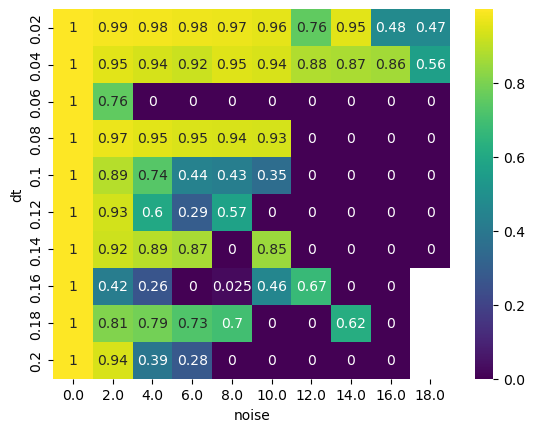

: 

In [ ]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
